In [1]:
import math
import cv2 as cv
import numpy as np
import pandas as pd
from glob import glob
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse

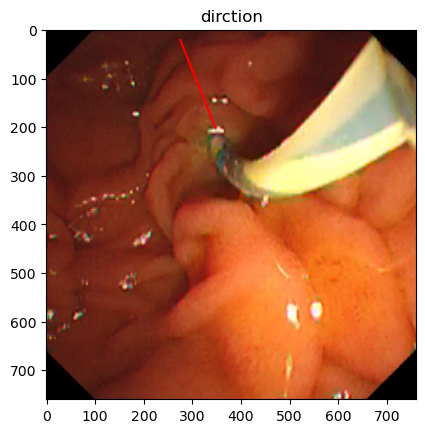

In [2]:
base_x = 1020
base_y = 160
img    = cv.imread('../dataset/temp_img/000140.png')
RGBimg = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.plot([1295-base_x, 1367-base_x], [181-base_y, 361-base_y],color="red")
plt.imshow(RGBimg)
plt.title('dirction')
plt.show()

# Canny 邊緣偵測

In [3]:
# create a CLAHE object
# def clahe(img):
#     clahe_ = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#     cl1    = clahe_.apply(img)
#     return cl1


# def equ(img):
#     equ_ = cv.equalizeHist(img)
#     return equ

In [11]:
def img_precessing(img, medianblur_kernel=21, canny_threshold1=5, canny_threshold2=40):
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)                     # 轉成灰階
    # img_blur = cv.medianBlur(img_gray, medianblur_kernel)              # median blur 
    img_blur = img_gray                                                # no median blur 
    img_edges= cv.Canny(img_blur, canny_threshold1, canny_threshold2)  # canny

    return img_gray, img_blur, img_edges

In [12]:
def Get_canny_angles(img_paths, medianblur_kernel=21, canny_threshold1=5, canny_threshold2=40):
    canny_pred_angles=[]

    for img_path in img_paths:
        img_name = img_path.split("/")[-1]
        img      = cv.imread(img_path)

        img_gray, blur, edges = img_precessing(img, medianblur_kernel, canny_threshold1, canny_threshold2)
        print(img_name)
        ###############
        cnt, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

        ###### 找全部的輪廓出來畫
        allcnt=[]
        for c in cnt:
            allcnt.extend(c.tolist())
        allcnt = np.array(allcnt)   # 有可能找不到輪廓!!
        if len(allcnt) != 0:
            
            ####### 找出橢圓
            img_elli = img.copy()
            ellipse = cv.fitEllipseAMS(allcnt)  # fit出橢圓
            # cv.ellipse(img_elli, ellipse, (0,0,255), 3)
            
            ####### 找出角度(11點鐘方向)
            img_11=img.copy()
            (xc, yc), (width, height), angle = ellipse     # (xc,yc):橢圓中心點 (width, height):橢圓寬長
            print("angle= ", int(angle))
            
            if angle>90:  # 一開始的angle是比較長短邊的角度
                normal_angle = 360-angle-60
                print('normal angle=', normal_angle)
                

                ######################################## 處理特殊角度(150~180) ###############################################
                if normal_angle > 150 and normal_angle <=180:   
                    normal_angle = normal_angle - 30
                    canny_pred_angles.append((img_name, normal_angle))
                    rmajor = height / 2
                    xtop0  = xc + math.cos(math.radians(angle+120)) * rmajor
                    ytop0  = yc + math.sin(math.radians(angle+120)) * rmajor
                    rmajor = height / 2
                    xtop11 = xc + math.cos(math.radians(angle+90)) * rmajor
                    ytop11 = yc + math.sin(math.radians(angle+90)) * rmajor
                    rminor = width / 2
                    xtop = xc + math.cos(math.radians(angle+30)) * rminor
                    ytop = yc + math.sin(math.radians(angle+30)) * rminor
                    ellipse_info = Ellipse(xy=(xc, yc), width=width, height=height, angle=angle+30, edgecolor='b', fc='None', lw=2, linestyle='dotted')
                ######################################## 處理特殊角度(180~) ################################################
                elif normal_angle > 180:                         
                    normal_angle = normal_angle - 60
                    canny_pred_angles.append((img_name, normal_angle))
                    rmajor = height / 2
                    xtop0  = xc + math.cos(math.radians(angle+150)) * rmajor
                    ytop0  = yc + math.sin(math.radians(angle+150)) * rmajor
                    rmajor = height / 2
                    xtop11 = xc + math.cos(math.radians(angle+120)) * rmajor
                    ytop11 = yc + math.sin(math.radians(angle+120)) * rmajor
                    rminor = width / 2
                    xtop = xc + math.cos(math.radians(angle+60)) * rminor
                    ytop = yc + math.sin(math.radians(angle+60)) * rminor
                    ellipse_info = Ellipse(xy=(xc, yc), width=width, height=height, angle=angle+60, edgecolor='b', fc='None', lw=2, linestyle='dotted')
                ######################################## 正常角度(0~150) ################################################
                else:
                    canny_pred_angles.append((img_name, normal_angle))
                    rmajor = height / 2
                    xtop0  = xc + math.cos(math.radians(angle+90)) * rmajor
                    ytop0  = yc + math.sin(math.radians(angle+90)) * rmajor
                    rmajor = height / 2
                    xtop11 = xc + math.cos(math.radians(angle+60)) * rmajor
                    ytop11 = yc + math.sin(math.radians(angle+60)) * rmajor
                    rminor = width / 2
                    xtop = xc + math.cos(math.radians(angle)) * rminor
                    ytop = yc + math.sin(math.radians(angle)) * rminor
                    ellipse_info = Ellipse(xy=(xc, yc), width=width, height=height, angle=angle, edgecolor='b', fc='None', lw=2, linestyle='dotted')

                print('new normal angle=', normal_angle)
                cv.line(img_11, (int(xtop0), int(ytop0)), (int(xc), int(yc)), (0, 0, 255), 1)
                cv.line(img_11, (int(xtop11), int(ytop11)), (int(xc), int(yc)), (128, 0, 0), 3)
                cv.line(img_11, (int(xtop), int(ytop)), (int(xc), int(yc)), (0, 0, 255), 1)
                


            if angle<90:
                normal_angle = 180-angle-60
                print('normal angle=', normal_angle)
                

                ######################################## 處理特殊角度(0~30) ###############################################  
                if normal_angle > 0 and normal_angle <= 30:   
                    normal_angle = normal_angle + 60                            ## !!!!!!!!!!!!!
                    canny_pred_angles.append((img_name, normal_angle))
                    rmajor = height / 2
                    xtop0  = xc + math.cos(math.radians(angle+210)) * rmajor
                    ytop0  = yc + math.sin(math.radians(angle+210)) * rmajor
                    rmajor = height / 2
                    xtop11 = xc + math.cos(math.radians(angle+180)) * rmajor
                    ytop11 = yc + math.sin(math.radians(angle+180)) * rmajor
                    rminor = width / 2
                    xtop = xc + math.cos(math.radians(angle+120)) * rminor
                    ytop = yc + math.sin(math.radians(angle+120)) * rminor
                    ellipse_info = Ellipse(xy=(xc, yc), width=width, height=height, angle=angle+120, edgecolor='b', fc='None', lw=2, linestyle='dotted')
                ######################################## 處理特殊角度(30~60) ###############################################
                elif normal_angle > 30 and normal_angle <= 60:   
                    normal_angle = normal_angle + 30                            ## !!!!!!!!!!!!!!
                    canny_pred_angles.append((img_name, normal_angle))
                    rmajor = height / 2
                    xtop0  = xc + math.cos(math.radians(angle+240)) * rmajor
                    ytop0  = yc + math.sin(math.radians(angle+240)) * rmajor
                    rmajor = height / 2
                    xtop11 = xc + math.cos(math.radians(angle+210)) * rmajor
                    ytop11 = yc + math.sin(math.radians(angle+210)) * rmajor
                    rminor = width / 2
                    xtop = xc + math.cos(math.radians(angle+150)) * rminor
                    ytop = yc + math.sin(math.radians(angle+150)) * rminor
                    ellipse_info = Ellipse(xy=(xc, yc), width=width, height=height, angle=angle+150, edgecolor='b', fc='None', lw=2, linestyle='dotted')
                ######################################## 正常角度(0~150) ################################################
                else:
                    canny_pred_angles.append((img_name, normal_angle))
                    rmajor = height / 2
                    xtop0  = xc + math.cos(math.radians(angle+270)) * rmajor
                    ytop0  = yc + math.sin(math.radians(angle+270)) * rmajor
                    rmajor = height / 2
                    xtop11 = xc + math.cos(math.radians(angle+240)) * rmajor
                    ytop11 = yc + math.sin(math.radians(angle+240)) * rmajor
                    rminor = width / 2
                    xtop = xc + math.cos(math.radians(angle+180)) * rminor
                    ytop = yc + math.sin(math.radians(angle+180)) * rminor
                    ellipse_info = Ellipse(xy=(xc, yc), width=width, height=height, angle=angle+180, edgecolor='b', fc='None', lw=2, linestyle='dotted')
                
                print('new normal angle=', normal_angle)
                cv.line(img_11, (int(xtop0), int(ytop0)), (int(xc), int(yc)), (0, 0, 255), 1)
                cv.line(img_11, (int(xtop11), int(ytop11)), (int(xc), int(yc)), (128, 0, 0), 3)
                cv.line(img_11, (int(xtop), int(ytop)), (int(xc), int(yc)), (0, 0, 255), 1)

            
            ################# plot img
            # plt.figure()
            # f, axarr = plt.subplots(1, 5,figsize=(20,8)) 
            # axarr[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
            # axarr[1].imshow(cv.cvtColor(img_gray, cv.COLOR_BGR2RGB))
            # axarr[2].imshow(cv.cvtColor(blur, cv.COLOR_BGR2RGB))
            # axarr[3].imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB))
            # axarr[4].imshow(cv.cvtColor(img_11, cv.COLOR_BGR2RGB))
            # plt.show()
            ##################### save img
            # plt.imsave("../dataset/training_dataset/img/train/Crop_Gray/{}".format(img_name), cv.cvtColor(img_gray, cv.COLOR_BGR2RGB))       # !!!!!!!!!!!!
            # plt.imsave("../dataset/training_dataset/img/train/Crop_MedianBlur/{}".format(img_name), cv.cvtColor(blur, cv.COLOR_BGR2RGB))     # !!!!!!!!!!!!
            # plt.imsave("../dataset/training_dataset/img/train/Crop_CannyEdge/{}".format(img_name), cv.cvtColor(edges, cv.COLOR_BGR2RGB))     # !!!!!!!!!!!!
            # plt.imsave("../dataset/result_img/canny_traindata_direction_result/canny_{}".format(img_name), cv.cvtColor(img_11, cv.COLOR_BGR2RGB))  # !!!!!!!!!!!!

            # plt.figure()
            # f, ax = plt.subplots(figsize=(3,4)) 
            # ax.add_artist(ellipse_info)  # 橢圓
            # ax.set_axis_off()
            # plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
            # plt.savefig("../dataset/result_img/canny_traindata_ellipse_result/ellipse_{}".format(img_name),bbox_inches='tight', pad_inches=0)    # !!!!!!!!!!!!
            # plt.close(f)

    return canny_pred_angles

In [13]:
def Get_MAE(canny_pred_angles, true_df):
    canny_pred_df = pd.DataFrame(canny_pred_angles,columns=['img_name','canny_angle'])
    # print(cannytes_df.shape)

    ''' true data left join '''
    true_df_all = true_df.merge(canny_pred_df, on=['img_name'], how='left')

    true_df_all['angle_error'] = abs(true_df_all['old_angle']-true_df_all['canny_angle'])

    print("-----------------------------")
    mae = round(true_df_all['angle_error'].mean(),3)
    print("mean angle error= ", mae)
    
    pmae = mae/180
    print("percentage mean angle error= ", pmae)
    return true_df_all, mae, pmae

In [14]:
train_img_paths     = sorted(glob('../dataset/training_dataset/img/train/Crop/*.png'))                  # !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! 換資料集
val_img_paths       = sorted(glob('../dataset/training_dataset/img/validation/Crop/*.png'))
train_val_img_paths = train_img_paths + val_img_paths


'''use old_angle(true)'''
train_df     = pd.read_csv('../dataset/training_dataset/direc/train/old_angle_20221222.csv') 
val_df       = pd.read_csv('../dataset/training_dataset/direc/validation/old_angle_20221222.csv') 
train_val_df = pd.concat([train_df,val_df],axis=0)


# 找到最佳參數組合

In [15]:
train_mae_list=[]
for medianblur_kernel in range(9, 31, 4):
    for canny_threshold1 in range(5,20,5):
        for canny_threshold2 in range(35,44,5):
            print('========================',medianblur_kernel, canny_threshold1, canny_threshold2,'===========================')
            canny_pred_angles      = Get_canny_angles(train_val_img_paths, medianblur_kernel, canny_threshold1, canny_threshold2)
            true_df_all, mae, pmae = Get_MAE(canny_pred_angles, train_val_df)
            train_mae_list.append((medianblur_kernel, canny_threshold1, canny_threshold2, mae, pmae))

======================== 9 5 35 ===========================
a_000001.png
angle=  0
normal angle= 119.00102281570435
new normal angle= 119.00102281570435
a_000002.png
angle=  0
normal angle= 119.02377915382385
new normal angle= 119.02377915382385
a_000003.png
angle=  179
normal angle= 120.43751525878906
new normal angle= 120.43751525878906
a_000004.png
angle=  179
normal angle= 120.7691650390625
new normal angle= 120.7691650390625
a_000005.png
angle=  179
normal angle= 120.71310424804688
new normal angle= 120.71310424804688
a_000006.png
angle=  172
normal angle= 127.50564575195312
new normal angle= 127.50564575195312
a_000007.png
angle=  1
normal angle= 118.02291810512543
new normal angle= 118.02291810512543
a_000008.png
angle=  2
normal angle= 117.11869406700134
new normal angle= 117.11869406700134
a_000009.png
angle=  179
normal angle= 120.175048828125
new normal angle= 120.175048828125
a_000010.png
angle=  177
normal angle= 122.48109436035156
new normal angle= 122.48109436035156
b_00

In [16]:
# 結果
train_mae_list

[(9, 5, 35, 20.116, 0.11175555555555555),
 (9, 5, 40, 19.738, 0.10965555555555555),
 (9, 10, 35, 20.03, 0.11127777777777778),
 (9, 10, 40, 19.59, 0.10883333333333334),
 (9, 15, 35, 20.014, 0.11118888888888888),
 (9, 15, 40, 19.692, 0.1094),
 (13, 5, 35, 20.116, 0.11175555555555555),
 (13, 5, 40, 19.738, 0.10965555555555555),
 (13, 10, 35, 20.03, 0.11127777777777778),
 (13, 10, 40, 19.59, 0.10883333333333334),
 (13, 15, 35, 20.014, 0.11118888888888888),
 (13, 15, 40, 19.692, 0.1094),
 (17, 5, 35, 20.116, 0.11175555555555555),
 (17, 5, 40, 19.738, 0.10965555555555555),
 (17, 10, 35, 20.03, 0.11127777777777778),
 (17, 10, 40, 19.59, 0.10883333333333334),
 (17, 15, 35, 20.014, 0.11118888888888888),
 (17, 15, 40, 19.692, 0.1094),
 (21, 5, 35, 20.116, 0.11175555555555555),
 (21, 5, 40, 19.738, 0.10965555555555555),
 (21, 10, 35, 20.03, 0.11127777777777778),
 (21, 10, 40, 19.59, 0.10883333333333334),
 (21, 15, 35, 20.014, 0.11118888888888888),
 (21, 15, 40, 19.692, 0.1094),
 (25, 5, 35, 20.11

In [9]:
# import pickle
# with open("../dataset/result_mae/train/train_mae_result_20221222.pk", 'wb') as f:
#     pickle.dump(train_mae_list, f)

In [10]:
# min_i = 0
# min_mae = train_mae_list[0][3]

# for i in range(1, len(train_mae_list)):
#     if train_mae_list[i][3] < min_mae:
#         min_mae = train_mae_list[i][3]
#         min_i = i

# print(train_mae_list[min_i])

In [12]:
# 測試集結果
# test_img_paths = sorted(glob('../dataset/test_dataset/img/Crop/*.png'))
# tes_df         = pd.read_csv('../dataset/test_dataset/direc/old_angle_20221222.csv') 

# canny_pred_angles = Get_canny_angles(test_img_paths, medianblur_kernel=9, canny_threshold1=5, canny_threshold2=40)
# true_df_all, mae, mpae = Get_MAE(canny_pred_angles, tes_df)

# 在圖畫方向

In [ ]:
# img_names = cannytes_df['img_name'].values
# img_names[:5]

In [ ]:
# img_name = 'l_000058.png'
# img_name = 'h_000081.png'

# for img_name in img_names:

#     canny_angle = cannytes_df[cannytes_df['img_name']==img_name]['canny_angle'].values[0]
#     print('canny_angle= ',canny_angle)

#     # 把方向畫在左上角落
#     bbox_xc = (100+100)/2  
#     bbox_yc = (100+100)/2

#     xtop11 = bbox_xc + math.cos(math.radians(canny_angle)) * 100
#     ytop11 = bbox_yc - math.sin(math.radians(canny_angle)) * 100

#     uncrop_img = cv.imread(uncrop_img_path + img_name)
#     img_rgb    = cv.cvtColor(uncrop_img, cv.COLOR_BGR2RGB)  # 轉成RGB


#     plt.figure()
#     f, ax = plt.subplots() 
#     plt.plot([0, 200], [100, 100], color="gray", linestyle="--")   # 水平線
#     plt.plot([100, 100], [0, 100], color="gray", linestyle="--")   # 重直線
#     plt.plot([xtop11, bbox_xc], [ytop11, bbox_yc], color="r") # 11點方向線
#     plt.text(100, 100, int(canny_angle), ha='center', va='top', fontsize=10, color='white')
    
#     ax.set_axis_off()
#     plt.imshow(img_rgb)       # [x1:x2 ,y1:y2]
    
#     plt.savefig("../dataset/result_img/canny_testdata_upCrop_direction_result/direction_{}".format(img_name),bbox_inches='tight', pad_inches=0)
#     plt.close(f)



In [ ]:
# img_paths = sorted(glob('../dataset/training_dataset/img/train/Crop/*.png'))
# img_paths = sorted(glob('../dataset/training_dataset/img/validation/Crop/*.png'))
img_paths = sorted(glob('../dataset/test_dataset/img/Crop/*.png'))


for img_path in img_paths[2:4]:
    img_name = img_path.split("/")[-1].split(".")[-2]
    img      = cv.imread(img_path)
    img_rgb  = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # 轉成灰階
    # img_equ  = equ(img)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # 轉成灰階
    # clahe = clahe(img)
    blur_G  = cv.GaussianBlur(img_gray, (21, 21), 0)
    blur_M  = cv.medianBlur(img_gray, 21)
    # img   = cv.bilateralFilter(img, 15, 50,  50)
    blur_B  = cv.bilateralFilter(img_gray, 21, 50,  50)
    
    
    # canny
    # edges = cv.Canny(blur, 5, 30)

    # sobel
    x    = cv.Sobel(blur_M,cv.CV_16S,1,0)
    y    = cv.Sobel(blur_M,cv.CV_16S,0,1)
    absX = cv.convertScaleAbs(x)# 轉回uint8
    absY = cv.convertScaleAbs(y)
    dst  = cv.addWeighted(absX, 0.5, absY, 0.5, 0)
    # threshold
    # edges = scale(y, 20)
    # ret, th1 = cv.threshold(dst, 50, 255, cv.THRESH_BINARY)
    # th2 = cv.adaptiveThreshold(dst, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
    # th3 = cv.adaptiveThreshold(dst, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
    # edges = cv.addWeighted(absX,0.5,absY,0.5,0)

    # edges  = cv.medianBlur(edges, 3)
    edges_M = cv.Canny(blur_M, 5, 40)
    edges_G = cv.Canny(blur_G, 5, 40)
    edges_B = cv.Canny(blur_B, 5, 40)
    print(img_name)

    #### Save npz
    # np.save('../dataset/test_dataset/img/Crop_Edge/{}'.format(img_name), edges)
    # np.save('../dataset/training_dataset/img/validation/Crop_Edge/{}'.format(img_name), edges)
    # np.save('../dataset/training_dataset/img/train/Crop_Edge/{}'.format(img_name), edges)
    
    # plt.imsave('../dataset/test_dataset/img/Crop_Edge/{}'.format(img_name),edges)
    # plt.imshow(img,cmap='gray')
    # plt.title('Original Image')
    # plt.show()
    # plt.imshow(equ,cmap='gray')
    # plt.title('equalizeHist Image')
    # plt.show()

    # plt.imshow(blur,cmap='gray')
    # plt.title('blur Image')
    # plt.show()
    

    #subplot(r,c) provide the no. of rows and columns
    
    ###############
    # cnt, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # # 找最大的輪廓出來畫
    # max_i = 0
    # max_cnt = len(cnt[0])
    # for i in range(1, len(cnt)):
    #     if len(cnt[i])>max_cnt:
    #         max_cnt=len(cnt[i])
    #         max_i=i


    # 畫線
    # rows,cols = img.shape[:2]
    # [vx,vy,x,y] = cv.fitLine(cnt, cv.DIST_L2,0,0.01,0.01)
    # lefty = int((-x*vy/vx) + y)
    # righty = int(((cols-x)*vy/vx)+y)
    # cv.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

    # cv.drawContours(img, cnt, -1, 255, 3)
    # find the biggest countour (c) by the area
    # c = max(cnt, key = cv.contourArea)
    # x, y, w, h = cv.boundingRect(c)

    # draw the biggest contour (c) in green
    # cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    # hull = cv.convexHull(cnt[max_i])
    # length = len(hull)
    # for i in range(length):
    #     cv.line(img, tuple(hull[i][0]), tuple(hull[(i+1)%length][0]), (0,0,255), 2)
    # 绘制椭圆
    # ellipse = cv.fitEllipse(cnt[max_i])
    # cv.ellipse(img,ellipse,(0,0,255),10)
    ###############

    ###############
    plt.figure()
    f, axarr = plt.subplots(1, 5,figsize=(15,3)) 
    axarr[0].imshow(img_rgb)
    axarr[1].imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))
    axarr[2].imshow(cv.cvtColor(edges_G, cv.COLOR_BGR2RGB))
    axarr[3].imshow(cv.cvtColor(edges_M, cv.COLOR_BGR2RGB))
    axarr[4].imshow(cv.cvtColor(edges_B, cv.COLOR_BGR2RGB))
    plt.show()
    #####################

In [ ]:
# from math import sin, cos, pi
# def cumulativeMatrix(edges, Maxrho):
#     """
#     theta = angle * (pi / 180)
#     rho   = x * cos(theta) + y * sin(theta)
#     :return A:(rho, angle) Cumulative Matrix
#     """
#     A = np.zeros((2*Maxrho, 360))             # rho range(-2000~2000)
#     whiteIndexs = np.argwhere(edges == 255)   # whiteIndexs: gray scale=255 index
#     print("calculate point number:", len(whiteIndexs))
    
#     # cumulative 
#     for index in whiteIndexs:
#         x, y = index[0], index[1]
#         for angle in range(360):
#             theta = angle * (pi / 180)
#             rho   = int(x * cos(theta) + y * sin(theta) + 0.5 )   # round(rho)
#             A[rho + Maxrho][angle] += 1  
#     return A

# def lineInfo(A, linenumber=30):
#     """
#     Get the (rho, angle) of max value in cumulative matrix.
    
#     :linenumber: number of line  
#     :return: list [[rho, angle],[rho, angle]]
#     """
#     sortedvalue = np.sort(A, axis=None)[::-1][:linenumber]    # 找出最多的80個線的資訊 fush:100 scene:100  crossing:220

#     ras = []
#     for sv in sortedvalue:
#         ra = np.argwhere(A==sv)[0].tolist()
#         if ra not in ras:
#             ras.append(ra)

#     return ras
    
# def deleteAdjacentLine(ras, diff=10):
#     """
#     Delete the adjacent lines and keep the only straight line.
#     :method: if (rho2 + angle2)-(rho1 + angle1) < diff then delete line [rho2,angle2].
    
#     :diff: maximum difference
#     :ras: [[rho, angle],[rho, angle]]
#     :return: [[rho, angle],[rho, angle]] 
#     """
#     wantdeletes = []
#     sorted_ras = sorted(ras)
#     for i in range(len(sorted_ras)):
#         for j in range(i+1, len(sorted_ras)):
#             if abs(sum(sorted_ras[j]) - sum(sorted_ras[i])) < diff:                           # sea:30 scene:30 crossing:4 fish:10
#                 wantdeletes.append(sorted_ras[j])
#     for wantdelete in wantdeletes:
#         if wantdelete in sorted_ras:
#             sorted_ras.remove(wantdelete)
#     return sorted_ras
    
# def line_point(rho, theta):
    # """
    # :rho = x*cos(theta)+y*sin(theta)
    # :return y_plot:type list 
    #         x_plot:type list
    # """
    # x = np.linspace(0, edges.shape[1], 10000)     # np.linspace(開始,結束,樣本數)
    # y = (rho - x * cos(theta)) / sin(theta)

    # x_plot, y_plot = [], []
    # for i in range(len(x)):
    #     if y[i] > 0 and x[i] < edges.shape[0] - 1 and y[i] < edges.shape[1]-1:
    #         x_plot.append(x[i])
    #         y_plot.append(y[i])
            
    # return y_plot, x_plot



# def cumulativeMatrix3D(edges, padding=2000):
#     """
#     :padding: padding the cumulative matrix record more information.
#     :method:
#         radius: >10
#         angle : 0~360
#         a = x - r * cos(angle*(pi/180))
#         b = y - r * sin(angle*(pi/180))
#     :return A:(a, b, radius) Cumulative Matrix
#     """
#     restore = padding//2
    
#     radius = min(edges.shape[0], edges.shape[1])//2          # radius=minimum image length or width
#     A      = np.zeros((edges.shape[0] + padding, edges.shape[1] + padding, radius))   # A padding=2000
#     whiteIndexs = np.argwhere(edges == 255)                  # whiteIndexs:(x,y) gray scale=255 index 
#     print("calculate point number:", len(whiteIndexs))
    
#     # cumulative 
#     n = 0
#     for index in whiteIndexs:                     # (x,y)
#         x, y = index[0], index[1]
#         for r in range(20, radius):               # radius     
#             for angle in range(360):        
#                 a = int(x - r * cos(angle*(pi/180)) + 0.5)            
#                 b = int(y - r * sin(angle*(pi/180)) + 0.5)
                
#                 if a >= A.shape[0] + restore:             # a, b bigger than padding
#                     continue
#                 if b >= A.shape[1] + padding:
#                     continue
                
#                 A[a + restore, b + restore, r] += 1
        
#         if n%1000==0:
#             print("{} finish".format(n))
#         n += 1
#     return A

# def lineInfo(A, cyclenumber=30):
#     """
#     Get the (rho, angle) of max value in cumulative matrix.
    
#     :cyclenumber: number of line  
#     :return: list [[a,b,r], [a,b,r]]
#     """
#     sortedvalue = np.sort(A, axis=None)[::-1][:cyclenumber]    
#     abrs = []
#     for sv in sortedvalue:
#         abr = np.argwhere(A==sv)[0].tolist()
#         if abr not in abrs:
#             abrs.append(abr)

#     return abrs

# def deleteAdjacentCycle(abrs, diff=30):
#     """
#     Delete the adjacent Cycles.
#     :method: if (a2 + b2 + r2)-(a1 + b1 + r1) < diff then delete cycle [a2,b2,r2].
    
#     :diff: maximum difference
#     :ras: [[a,b,r], [a,b,r]]
#     :return: [[a,b,r], [a,b,r]]
#     """
    
#     wantdeletes = []
#     sorted_abrs = sorted(abrs)
#     for i in range(len(sorted_abrs)):
#         for j in range(i+1, len(sorted_abrs)):
#             if abs(sum(sorted_abrs[j]) - sum(sorted_abrs[i])) < diff:    # 
#                 wantdeletes.append(sorted_abrs[j])

#     for wantdelete in wantdeletes:
#         if wantdelete in sorted_abrs:
#             sorted_abrs.remove(wantdelete)
#     return sorted_abrs

    

In [ ]:
# Maxrho= 1000
# A     = cumulativeMatrix(edges, Maxrho)
# ras   = lineInfo(A, linenumber=30)
# sorted_ras = deleteAdjacentLine(ras, diff=1)

# padding = 1000
# A      = cumulativeMatrix3D(edges, padding=padding)
# abrs        = lineInfo(A, cyclenumber=100)
# sorted_abrs = deleteAdjacentCycle(abrs, diff=5)


# figure, axes = plt.subplots()
# axes.set_aspect(1)

# for abr in abrs:
#     axes.add_artist(plt.Circle((abr[1]-padding//2, abr[0]-padding//2), abr[2], fill=False, color='red', linewidth=2))

# plt.imshow(edges, cmap='Greys_r')
# plt.show()


# figure, axes = plt.subplots()
# axes.set_aspect(1)
# for abr in sorted_abrs:
#     axes.add_artist(plt.Circle((abr[1]-padding//2, abr[0]-padding//2), abr[2], fill=False, color='red', linewidth=2))

# plt.imshow(edges, cmap='Greys_r')
# plt.show()

In [ ]:
# img = cv.imread('../dataset/training_dataset/img/train/Crop/c_000050.png', 0)

# # create a CLAHE object
# # clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(1,1))
# # cl1   = clahe.apply(img)
# # blur  = cv.GaussianBlur(cl1, (15, 15), 0)
# # edges = cv.Canny(blur,50,100)

# blur = cv.medianBlur(img, 15)
# y = cv.Sobel(blur,cv.CV_16S,0,1)
# y = cv.convertScaleAbs(y)
# edges = scale(y, 20)
# plt.imshow(y, cmap='gray')
# plt.show()
# # plt.imshow(cl1, cmap='gray')
# # plt.show()
# plt.imshow(edges,cmap = 'gray')
# plt.title('Edge Image')
# plt.show()

# '''
# 第一個引數是尋找輪廓的影象；

# 第二個參數列示輪廓的檢索模式，有四種（本文介紹的都是新的cv2介面）：
#     cv2.RETR_EXTERNAL表示只檢測外輪廓
#     cv2.RETR_LIST檢測的輪廓不建立等級關係
#     cv2.RETR_CCOMP建立兩個等級的輪廓，上面的一層為外邊界，裡面的一層為內孔的邊界資訊。如果內孔內還有一個連通物體，這個物體的邊界也在頂層。
#     cv2.RETR_TREE建立一個等級樹結構的輪廓。

# 第三個引數method為輪廓的近似辦法
#     cv2.CHAIN_APPROX_NONE儲存所有的輪廓點，相鄰的兩個點的畫素位置差不超過1，即max（abs（x1-x2），abs（y2-y1））==1
#     cv2.CHAIN_APPROX_SIMPLE壓縮水平方向，垂直方向，對角線方向的元素，只保留該方向的終點座標，例如一個矩形輪廓只需4個點來儲存輪廓資訊
#     cv2.CHAIN_APPROX_TC89_L1，CV_CHAIN_APPROX_TC89_KCOS使用teh-Chinl chain 近似演算法
# '''


# edgesCOPY = edges.copy()
# circles = cv.HoughCircles(edgesCOPY,
#                           cv.HOUGH_GRADIENT,
#                           dp=8,
#                           minDist=100,
#                           param1=10,  #canny高的閥值(小的閥值就除以2)
#                           param2=20,
#                           minRadius=0,
#                           maxRadius=50)


# figure, axes = plt.subplots()
# axes.set_aspect(1)
# circles = np.uint16(np.around(circles))
# for i in circles[0,:]:
#     # draw the outer circle
#     axes.add_artist(plt.Circle((i[0],i[1]),
#                i[2]+20,
#                fill=False,
#                color='red',
#                linewidth=2
#               ))
# print(len(circles[0,:]))

# plt.title('detect cycle')
# plt.imshow(img, cmap = 'Greys_r')
# plt.show()